In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from IPython.display import display, HTML

matches = pd.read_csv('results.csv')

In [2]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
matches =  matches.astype({'date':'datetime64[ns]'})

Text(0.5,1,'TOP 10 TYPE OF MATCH TOURNAMENT')

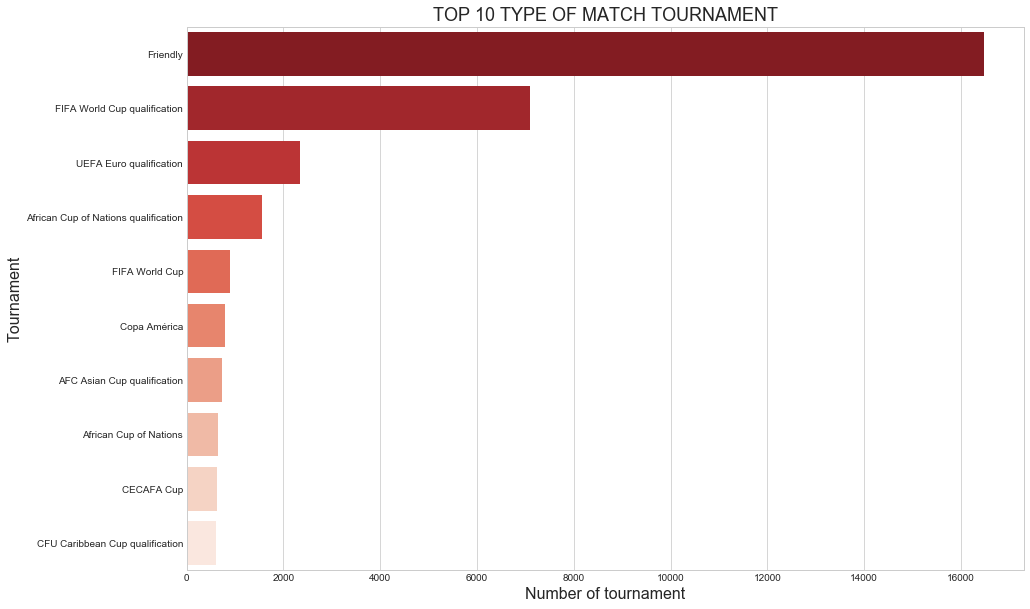

In [4]:
tournament = matches['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")

ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENT", fontsize=18)

In [5]:
home = matches[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = matches[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})


team_score = home.append(away).reset_index(drop=True)

country_info = team_score.groupby('team')['score'].agg(['sum', 'count', 'mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})


Text(0.5,1,'TOP 10 OF GOAL AVERAGE PER MATCH')

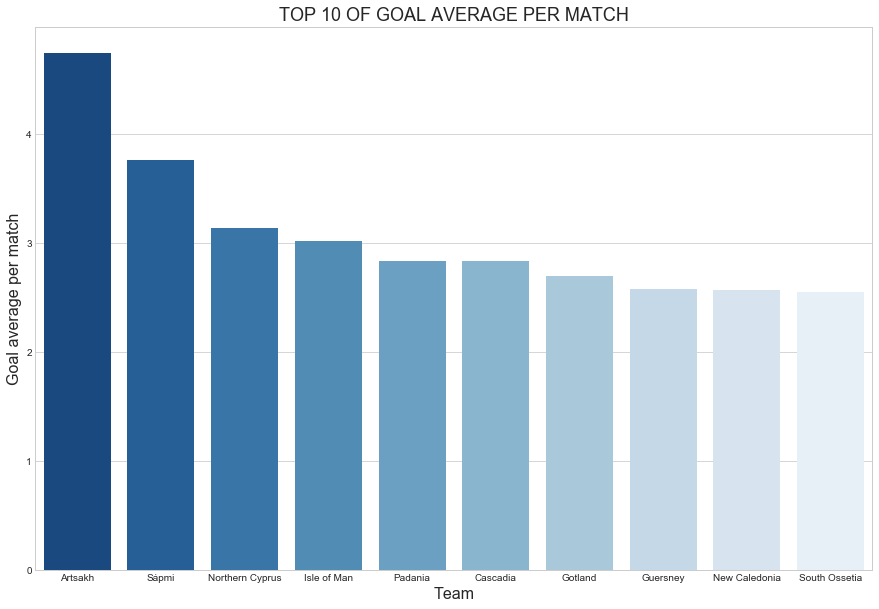

In [6]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")

plt_data = country_info.sort_values(by='goal_avg', ascending= False)[:10]
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")

ax.set_xlabel('Team', size=16)
ax.set_ylabel('Goal average per match', size=16)
ax.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

Text(0.5,1,'TOP 10 OF NUMBER OF MATCHES')

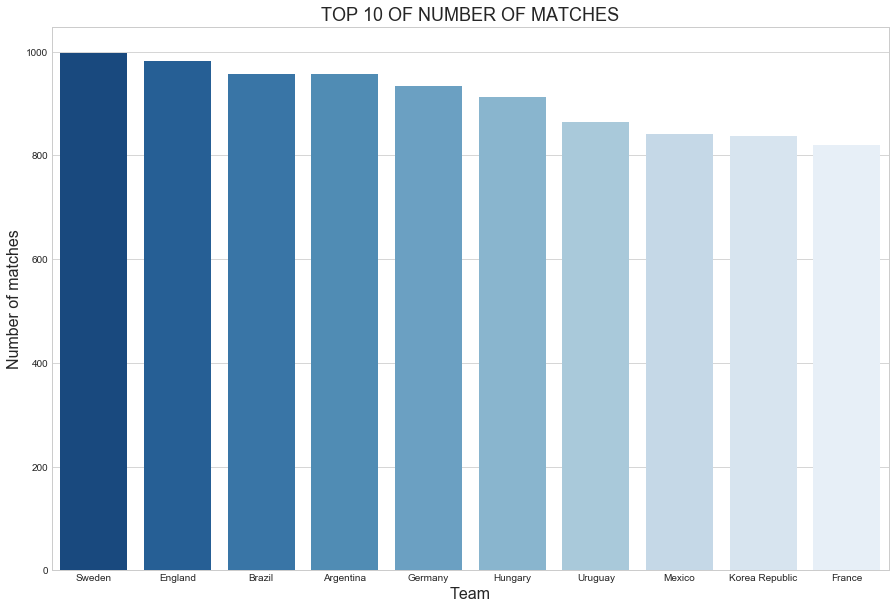

In [7]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
plt_data=country_info.sort_values(by='nb_matches', ascending=False)[:10]

ax = sns.barplot(x='team', y = 'nb_matches', data=plt_data, palette='Blues_r')
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of matches', size=16)
ax.set_title('TOP 10 OF NUMBER OF MATCHES', fontsize=18)

Text(0.5,1,'TOP 10 OF NUMBER OF GOAL')

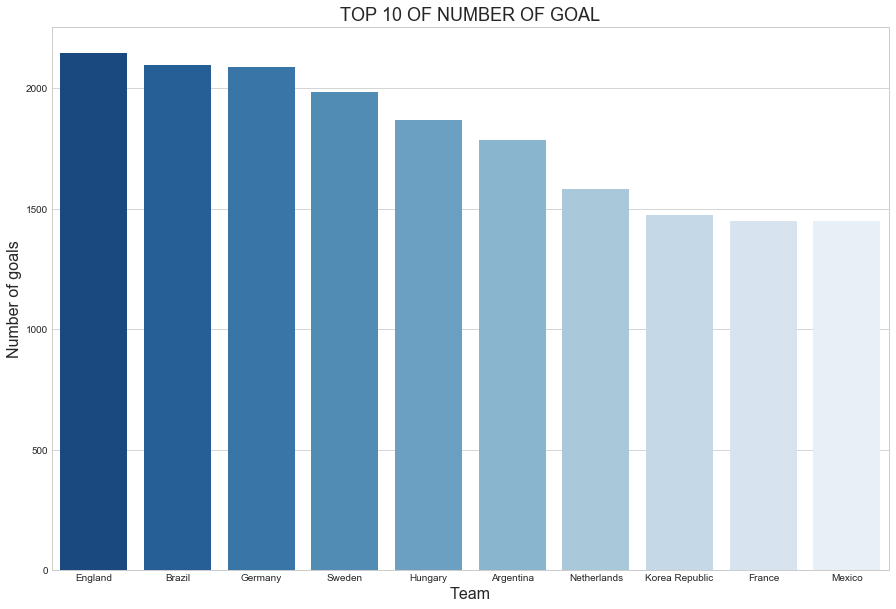

In [8]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')

plt_data=country_info.sort_values(by='nb_goals', ascending=False)[:10]

ax = sns.barplot(x='team', y='nb_goals', data=plt_data, palette='Blues_r')
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title('TOP 10 OF NUMBER OF GOAL', fontsize=18)

In [9]:
means = matches[['home_score', 'away_score']].mean()
means

home_score    1.747763
away_score    1.187880
dtype: float64

# Poisson distribution :

it's a discrete probability distribution (it provides the probabilities of occurrence of different possible outcomes in an event) that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event (Wikipedia definition).

An important assumption is that each events are independent in time. Here, it means that goals don't become more or less likely by the number of goals that is already scored in a match. 

### Poisson distribution for the score

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


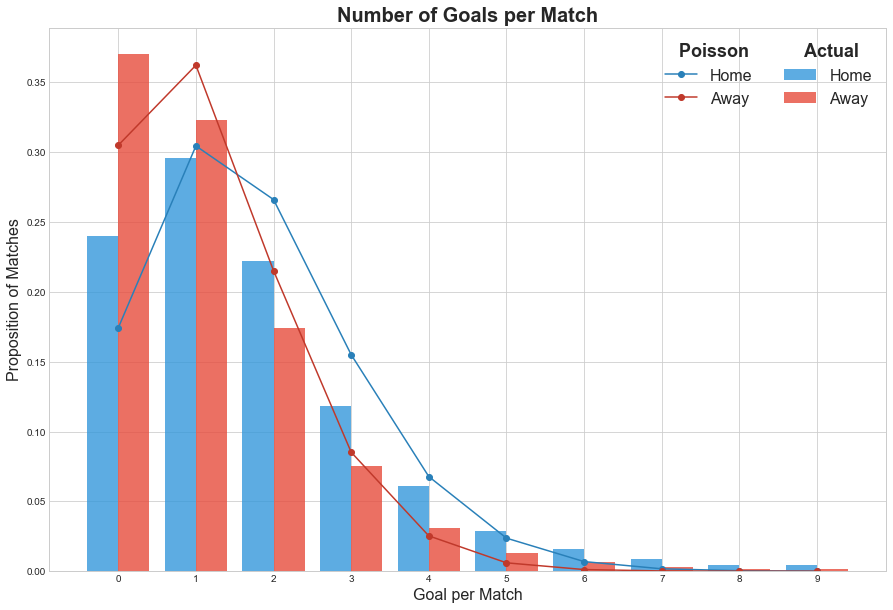

In [10]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')

# construct POISSON DISTRIBUTION for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(k, means[j]) for k in range(10)] for j in range(2)])

# plot histogram of actual goals
plt.hist(matches[['home_score', 'away_score']].values, range(11), alpha=0.8,
         label=['Home', 'Away'],normed=True, color=["#3498db", "#e74c3c"])

# line chart for Poisson distribution
pois1, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#2980b9')
pois2, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#c0392b')

# add legend
leg = plt.legend(loc='upper right', fontsize=16, ncol=2)
leg.set_title('Poisson           Actual', prop={'size':'18', 'weight':'bold'})

#plot
plt.xticks([i-0.5 for i in range(1,11)],[i for i in range(11)])
plt.xlabel('Goal per Match', size=16)
plt.ylabel('Proposition of Matches', size=16)
plt.title('Number of Goals per Match', size=20, fontweight='bold')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


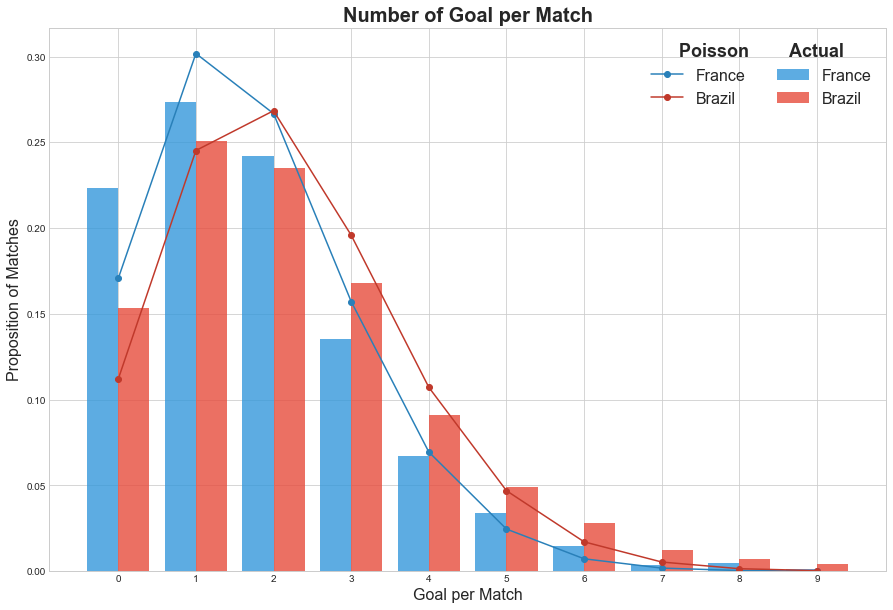

In [11]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
team1 = 'France'
team2 ='Brazil'
matches_t1 = team_score[team_score['team'] == team1]
matches_t2 = team_score[team_score['team'] == team2]

mean_t1 = matches_t1['score'].mean()
mean_t2 = matches_t2['score'].mean()

#contruct Poisson Distribution for each mean goals value
poisson_pred_t1 = [poisson.pmf(k, mean_t1) for k in range(10)]
poisson_pred_t2 = [poisson.pmf(k, mean_t2) for k in range(10)]

#plot histogram for actual goals
plt.hist([matches_t1['score'].values, matches_t2['score'].values], range(11), alpha=0.8,
        label=[team1, team2], normed=True, color=['#3498db', '#e74c3c'])

# add line chart for poisson distribution
pois1, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred_t1, 
                 linestyle='-', marker='o', color='#2980b9', label=team1)
pois2, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred_t2, 
                 linestyle='-', marker='o', color='#c0392b', label=team2)

#add legend
leg=plt.legend(loc='upper right', fontsize=16, ncol=2)
leg.set_title('Poisson        Actual', prop={'size':'18', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,11)], [i for i in range(11)])
plt.xlabel('Goal per Match', size=16)
plt.ylabel('Proposition of Matches', size=16)
plt.title('Number of Goal per Match', size=20, fontweight='bold')
plt.show()


## Build model
Now we can see that each team follow the Poisson distribution of number of game. Then, I will add a weight column that will be based on the date of game. After that, I will create the data for the model which is composed of 4 columns: team, opponent, goals, weight

In [12]:
def weight(tournament):
    if 'Cup' in tournament or 'Euro' in tournament:
        return 1
    else:
        return 1000
    
matches.loc[:, 'weight'] = matches['tournament'].apply(weight)
matches.loc[:, 'weight'] = 1 / ((2019-matches['date'].dt.year.astype('int64'))*matches['weight'])

#Create model's data
matches_model_data = pd.concat([matches[['home_team','away_team','home_score','weight']].rename(
            columns={'home_team':'team', 'away_team':'opponent','home_score':'goals'}),
           matches[['away_team','home_team','away_score','weight']].rename(
            columns={'away_team':'team', 'home_team':'opponent','away_score':'goals'})])

In [13]:
#using the statmodels library to create the model with a Poisson regression

poisson_model = smf.glm(formula='goals ~ team + opponent', data=matches_model_data, family=sm.families.Poisson(), freq_weights=matches_model_data['weight'].values).fit()

## Build necessary function

In [14]:
#Get match probability
def get_proba_match(football_model, team1, team2, max_goals=10):
    # Get average goals per team
    t1_goals_avg=football_model.predict(pd.DataFrame(data={'team':team1, 'opponent':team2}, index=[1])).values[0]
    t2_goals_avg=football_model.predict(pd.DataFrame(data={'team':team2, 'opponent':team1}, index=[1])).values[0]
    
    # Get probability of all possible score for each team
    team_pred=[[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [t1_goals_avg, t2_goals_avg]]
    
    #Get the matrix of the match
    match = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))
    
    #Get the probablity of each possible outcome
    t1_wins =  np.sum(np.tril(match, -1))
    draw = np.sum(np.diag(match))
    t2_wins = np.sum(np.triu(match, 1))
    result_proba = [t1_wins, draw, t2_wins]
    
    #Adjust the proba to sum to one
    result_proba=np.array(result_proba)/np.array(result_proba).sum(axis=0, keepdims=1)
    team_pred[0]=np.array(team_pred[0])/np.array(team_pred[0]).sum(axis=0, keepdims=1)
    team_pred[1]=np.array(team_pred[1])/np.array(team_pred[1]).sum(axis=0, keepdims=1)
    
    return result_proba, [np.array(team_pred[0]), np.array(team_pred[1])]

    

In [15]:
#Get match result
def get_match_result(football_model, team1, team2, elimination=False, max_draw=50, max_goal=10):
    #Get proba
    proba, score_proba = get_proba_match(football_model, team1, team2, max_goal)
    
    #Get result and if it's an elimination, we have to be sure that the result is not draw
    results= pd.Series([np.random.choice([team1, 'draw', team2], p=proba) for i in range(0, max_draw)]).value_counts()
    result = results.index[0] if not elimination or (elimination and results.index[0] != 'draw') else results.index[1]
    
    #If result is not draw, calculate the score of winner and loser
    if (result != 'draw'):
        i_win, i_lose = (0,1) if result == team1 else (1,0)
        score_proba[i_win] = score_proba[i_win][1:]/score_proba[i_win][1:].sum(axis=0, keepdims=1)
        winner_score=pd.Series([np.random.choice(range(1, max_goal+1), p=score_proba[i_win]) for i in range (0, max_draw)]).value_counts().index[0]
        score_proba[i_lose]= score_proba[i_lose][:winner_score]/score_proba[i_lose][:winner_score].sum(axis=0,keepdims=1)
        loser_score=pd.Series([np.random.choice(range(0, winner_score), p=score_proba[i_lose]) for i in range(0, max_draw)]).value_counts().index[0]
        score= [winner_score, loser_score]
        
    else:
        score = np.repeat(pd.Series([np.random.choice(range(0, max_goal+1), p=score_proba[0]) for i in range(0, max_draw)]).value_counts().index[0],2)
            
    loser = team2 if result == team1 else team1 if result != 'draw' else 'draw'
    
    return result, loser, score
        

In [16]:
print(get_match_result(poisson_model, 'Iran', 'Japan'))

('Japan', 'Iran', [1, 0])


In [17]:
print(get_match_result(poisson_model, 'England', 'Morocco'))

('England', 'Morocco', [2, 0])


In [18]:
print(get_match_result(poisson_model, 'Brazil', 'Vatican', max_goal=20))

('Brazil', 'Vatican', [8, 0])


In [19]:
print(get_match_result(poisson_model, 'France', 'Togo', elimination=True))

('France', 'Togo', [3, 0])


## Stimulate WC 2018

### Get group result function

In [20]:
def get_group_result(football_model, group):
    ranking = pd.DataFrame({'points':[0,0,0,0], 'diff':[0,0,0,0], 'goals':[0,0,0,0]}, index=group)
    
    for team1, team2 in itertools.combinations(group, 2):
        result, loser, score = get_match_result(football_model, team1, team2)
        
        if result=='draw':
            ranking.loc[[team1, team2], 'points'] +=1
            ranking.loc[[team1, team2], 'goals'] += score[0]
            
        else:
            ranking.loc[result, 'points'] += 3
            ranking.loc[result, 'goals'] += score[0]
            ranking.loc[loser, 'goals'] += score[1]
            ranking.loc[result, 'diff'] += score[0] - score[1]
            ranking.loc[loser, 'diff'] -= score[0] - score[1]
            
    return ranking.sort_values(by=['points', 'diff', 'goals'], ascending= False)

### Get final result

In [21]:
def get_final_result(football_model, groups_result):
    round_of_16 = []
    quater_finals = []
    semi_finals = []
    
    #Round of 16
    for i in range(0,8,2):
        round_of_16.append(get_match_result(football_model, groups_result[i].index[0], groups_result[i+1].index[1], elimination=True))
        round_of_16.append(get_match_result(football_model, groups_result[i].index[1], groups_result[i+1].index[1], elimination=True))
        
    #Quater finals
    quater_finals.append(get_match_result(football_model, round_of_16[0][0], round_of_16[2][0], elimination=True))
    quater_finals.append(get_match_result(football_model, round_of_16[1][0], round_of_16[3][0], elimination=True))
    quater_finals.append(get_match_result(football_model, round_of_16[4][0], round_of_16[6][0], elimination=True))
    quater_finals.append(get_match_result(football_model, round_of_16[5][0], round_of_16[7][0], elimination=True))
    
    #Semi finals
    semi_finals.append(get_match_result(football_model, quater_finals[0][0], quater_finals[2][0], elimination=True))
    semi_finals.append(get_match_result(football_model, quater_finals[1][0], quater_finals[3][0], elimination=True))
    
    #3rd place
    third_place_match = get_match_result(football_model, semi_finals[0][1], semi_finals[1][1], elimination=True)
    
    #Final
    final = get_match_result(football_model, semi_finals[0][0], semi_finals[1][0], elimination=True)
    
    
    return round_of_16, quater_finals, semi_finals, third_place_match, final

### Stimulate World Cup 2018

In [22]:
# Group
groupA = ['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay']
groupB = ['Portugal', 'Spain', 'Morocco', 'Iran']
groupC = ['France', 'Australia', 'Peru', 'Denmark']
groupD = ['Argentina', 'Iceland', 'Croatia', 'Nigeria']
groupE = ['Brazil', 'Switzerland', 'Costa Rica', 'Serbia']
groupF = ['Germany', 'Mexico', 'Sweden', 'Korea Republic']
groupG = ['Belgium', 'Panama', 'Tunisia', 'England']
groupH = ['Poland', 'Senegal', 'Colombia', 'Japan']
groups = [groupA, groupB, groupC, groupD, groupE, groupF, groupG, groupH]

In [23]:
#Get result of competition
groups_ranking = []

for group in groups:
    groups_ranking.append(get_group_result(poisson_model, group))
    
round_of_16, quater_finals, semi_finals, third_place_match, final = get_final_result(poisson_model, groups_ranking)

In [24]:
for group_rank in groups_ranking:
    display (group_rank)

,points,diff,goals
Uruguay,9,4,5
Russia,6,2,4
Saudi Arabia,1,-2,0
Egypt,1,-4,0


,points,diff,goals
Portugal,9,3,3
Spain,6,1,2
Iran,3,-1,1
Morocco,0,-3,0


,points,diff,goals
France,9,3,3
Denmark,6,1,2
Peru,3,-1,1
Australia,0,-3,0


,points,diff,goals
Argentina,9,3,4
Croatia,6,2,3
Iceland,3,-2,2
Nigeria,0,-3,0


,points,diff,goals
Brazil,9,6,6
Switzerland,4,-1,2
Serbia,4,-1,2
Costa Rica,0,-4,0


,points,diff,goals
Germany,9,4,5
Sweden,6,1,2
Mexico,3,-1,2
Korea Republic,0,-4,0


,points,diff,goals
England,9,7,7
Belgium,6,3,4
Tunisia,3,-4,2
Panama,0,-6,1


,points,diff,goals
Colombia,7,2,4
Japan,7,2,3
Poland,3,-1,2
Senegal,0,-3,0


In [25]:
display (round_of_16)

[('Spain', 'Uruguay', [1, 0]),
 ('Spain', 'Russia', [1, 0]),
 ('France', 'Croatia', [1, 0]),
 ('Denmark', 'Croatia', [1, 0]),
 ('Brazil', 'Sweden', [1, 0]),
 ('Sweden', 'Switzerland', [2, 0]),
 ('England', 'Japan', [1, 0]),
 ('Belgium', 'Japan', [2, 1])]

In [26]:
display (quater_finals)

[('France', 'Spain', [1, 0]),
 ('Spain', 'Denmark', [1, 0]),
 ('Brazil', 'England', [1, 0]),
 ('Belgium', 'Sweden', [1, 0])]

In [27]:
display (semi_finals)

[('Brazil', 'France', [1, 0]), ('Spain', 'Belgium', [1, 0])]

In [28]:
display (third_place_match)

('France', 'Belgium', [1, 0])

In [29]:
display (final)

('Spain', 'Brazil', [1, 0])

## DISPLAY RESULT

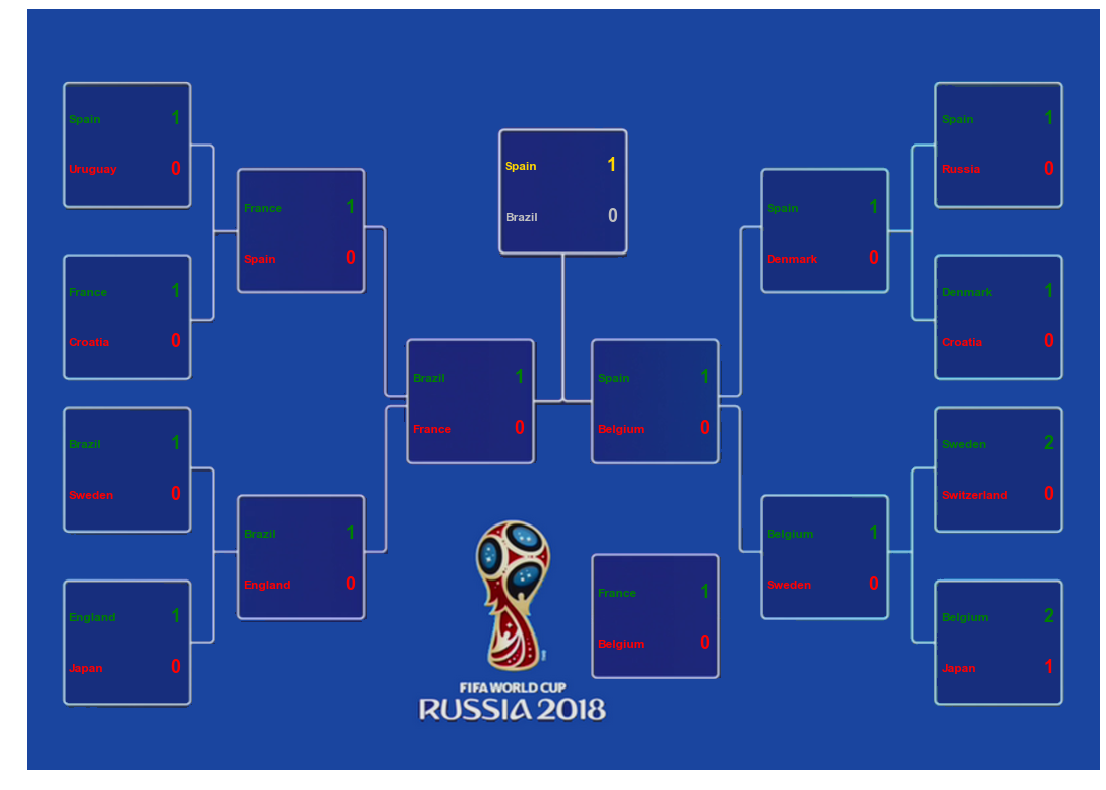

In [30]:
plt.figure(figsize = (25,14))
img = mpimg.imread('fifa-world-cup.png')
plt.imshow(img)
plt.axis('off')


def text_match(x, y, match, final=False):
    col_win, col_loose = ('green', 'red') if (not final) else ('gold', 'silver')
    plt.text(x, y, match[0], fontsize=12, color=col_win, weight='bold')
    plt.text(x+100, y+1, match[2][0], fontsize=18, color=col_win, weight='bold')
    plt.text(x, y+50, match[1], fontsize=12, color=col_loose, weight='bold')
    plt.text(x+100, y+51, match[2][1], fontsize=18, color=col_loose, weight='bold')


round_of_16_xy = [(40,110),(898,110),(40,280),(898,280),(40,430),(898,430),(40,600),(898,600)]
quarter_finals_xy = [(212,198),(726,198),(212,518),(726,518)]
semi_finals_xy = [(378,365),(560,365)]
x_third_place_match, y_third_place_match = 560, 576
x_final, y_final = 469, 157

for (x, y), match in zip(round_of_16_xy, round_of_16):
    text_match(x, y, match)
for (x, y), match in zip(quarter_finals_xy, quater_finals):
    text_match(x, y, match)
for (x, y), match in zip(semi_finals_xy, semi_finals):
    text_match(x, y, match)
text_match(x_third_place_match, y_third_place_match, third_place_match)
text_match(x_final, y_final, final, final=True)
plt.show()